# Finding Visible Turbulence

In [18]:
# generic imports because i'd rather have too many than too few
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from astropy.stats import mad_std
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from radio_beam import Beam
from astropy.io import fits
import astropy.units as u

In [2]:
%run functions.py

In [3]:
%run get_and_plot_vizier_nir.py

In [4]:
PAAC, turbulent_stars_offset, turbulence_offset, header_offset = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18800*u.AA)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [5]:
PAAL_pic =[]
subtract = []


for ii in range(1,11):
    countz = (10**ii)
    incorrect, PAAL, turbulence, header = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18750*u.AA, brightness=countz)
    turbulent = PAAL - PAAC
    PAAL_pic.append(PAAL)
    subtract.append(turbulent)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\m

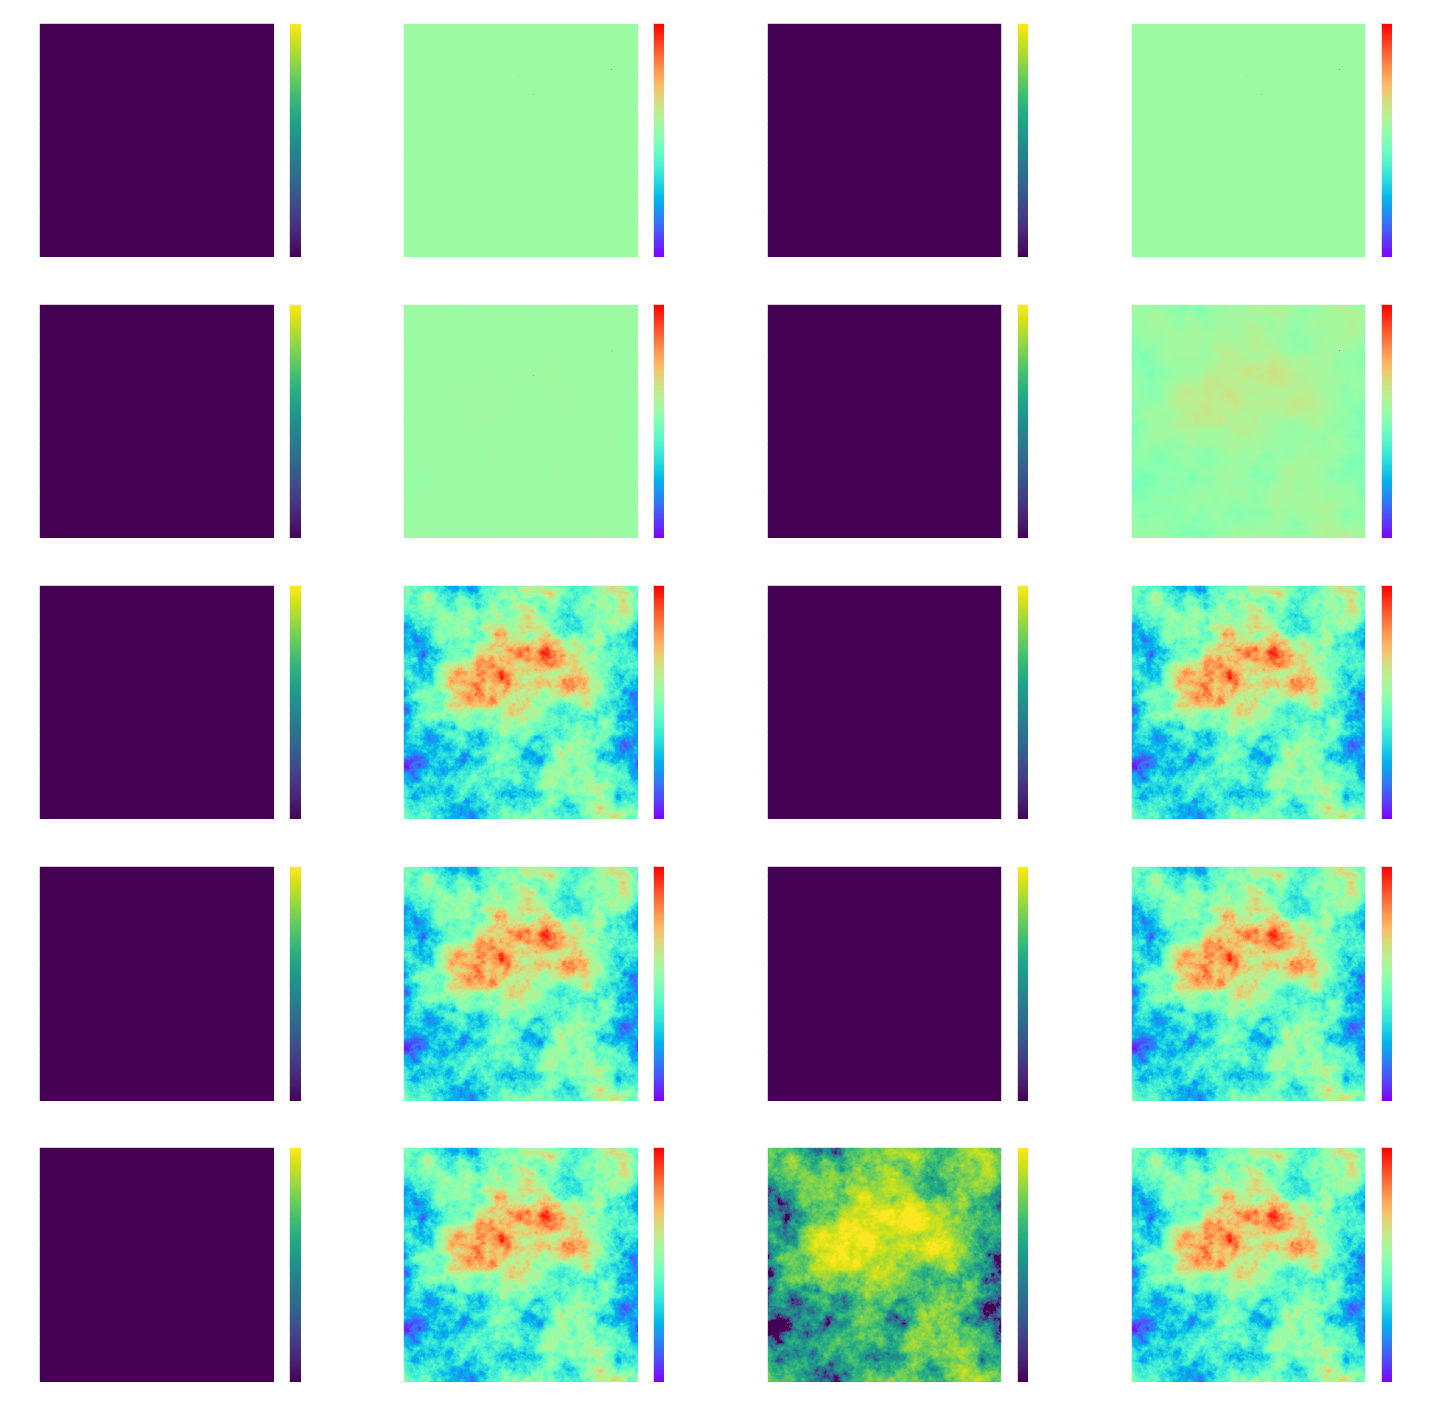

In [6]:
plt.figure(figsize=(25,25))
for ii in range(10):
    ax = plt.subplot(5,4,(ii)*2+1)
    pic = ax.imshow(PAAL_pic[ii], origin='lower', norm=visualization.simple_norm(PAAL, stretch='asinh',
                                         max_percent=99, min_percent=1))
    ax.set_title(f"PAAL with {countz} Counts Brightness")
    plt.colorbar(pic, ax=ax)
    ax = plt.subplot(5,4,(ii)*2+2)
    pix = ax.imshow(subtract[ii], origin='lower', cmap="rainbow")
    ax.set_title("Subtracted (PAAL-PAAC) Image")
    plt.colorbar(pix, ax=ax)


In [7]:
PAAL_pix =[]
subtracted = []


for ii in range(1,11):
    countz = ii*(10**4)
    incorrect, PAAL, turbulence, header = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18750*u.AA, brightness=countz)
    turbulent = PAAL - PAAC
    PAAL_pix.append(PAAL)
    subtracted.append(turbulent)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\m

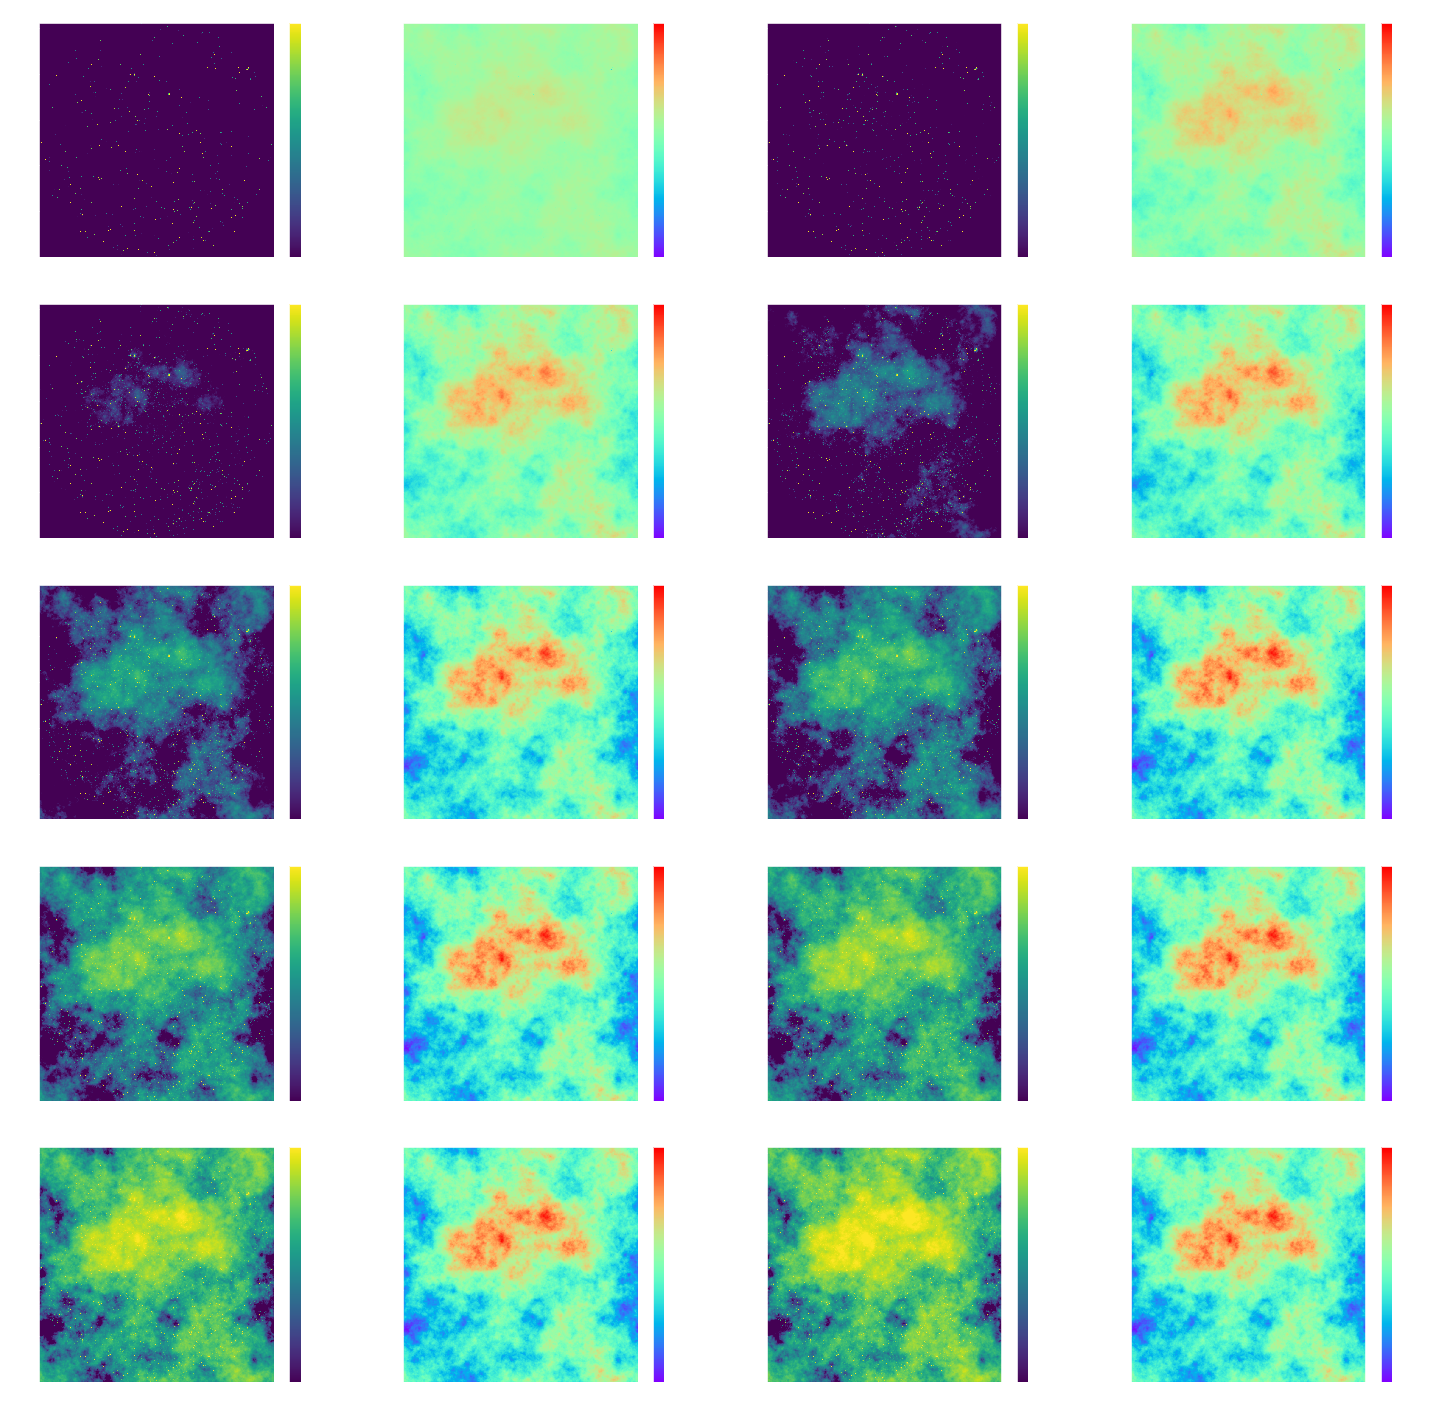

In [8]:
plt.figure(figsize=(25,25))
for ii in range(10):
    ax = plt.subplot(5,4,(ii)*2+1)
    pic = ax.imshow(PAAL_pix[ii], origin='lower', norm=visualization.simple_norm(PAAL, stretch='asinh',
                                         max_percent=99, min_percent=1))
    ax.set_title(f"PAAL with {countz} Counts Brightness")
    plt.colorbar(pic, ax=ax)
    ax = plt.subplot(5,4,(ii)*2+2)
    pix = ax.imshow(subtracted[ii], origin='lower', cmap="rainbow")
    ax.set_title("Subtracted (PAAL-PAAC) Image")
    plt.colorbar(pix, ax=ax)

# Noise Stats

In [38]:
incorrect, PAAL, turbulence, header = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18750*u.AA, brightness=2.5*(10**4))
incorrect, PAAC, turbulence, header = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18800*u.AA)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [39]:
x = []
y = []
error = []
chi = []
for ii in range (1, 151):
    x.append(ii)
    test_flux_ii = (PAAL - PAAC)
    ಠ_ಠ = test_flux_ii - turbulence
    ㆆ_ㆆ = ((ಠ_ಠ)**2).sum()
    error_sum = np.sqrt(PAAL + PAAC)
    res_sum = ((ಠ_ಠ/error_sum)**2).sum()
    y.append(ㆆ_ㆆ)
    error.append(error_sum)
    chi.append(res_sum)

Text(0, 0.5, 'Residual Square Sum [counts^2]')

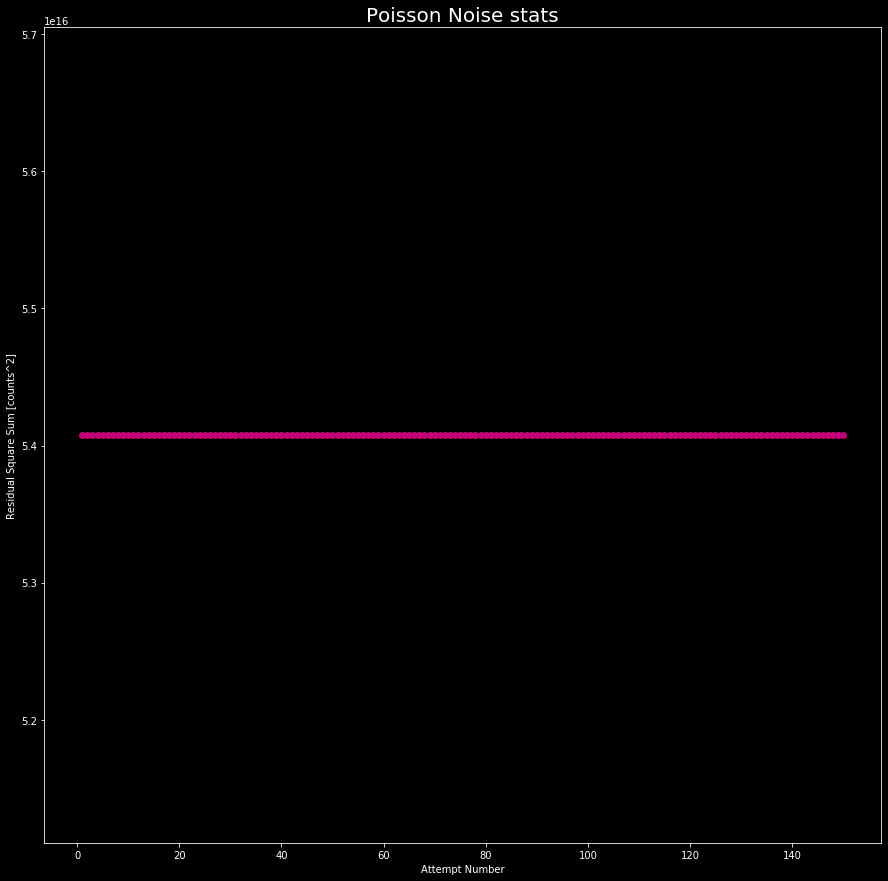

In [40]:
plt.figure(figsize=(15,15))
plt.plot(x, y, 'o', color='#c50077');
#plt.plot(x, error, "o", color='purple')
#plt.plot(x, chi, "o", color="blue")
plt.title('Poisson Noise stats', fontsize='20')
plt.xlabel('Attempt Number')
plt.ylabel('Residual Square Sum [counts^2]')
#plt.errorbar(x, y, yerr=error, fmt='.k')

C:\Users\mjfer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0.7, 0. , 0. , 0. , 0. , 0. , 0.7, 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7,
        0. , 0. , 0. , 0. , 1.4, 0.7, 0. , 0. , 0. , 0. ]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10. 

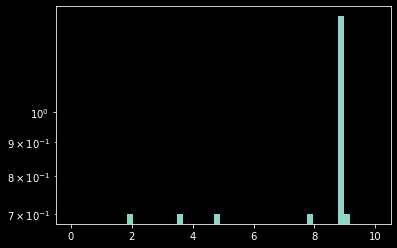

In [41]:
d = np.abs(test_flux_ii) / np.sqrt(PAAL)
plt.hist(np.abs(d).ravel(), bins=np.linspace(0,10), log=True, normed=True)

In [42]:
poisson_noise = np.sqrt(PAAL + PAAC)
systematic_noise = mad_std(PAAL-PAAC)
total_noise = np.sqrt(poisson_noise**2 + systematic_noise**2)

In [43]:
image_sub = PAAL - PAAC
snr = np.abs(image_sub) / total_noise

C:\Users\mjfer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Fraction of Pixels')

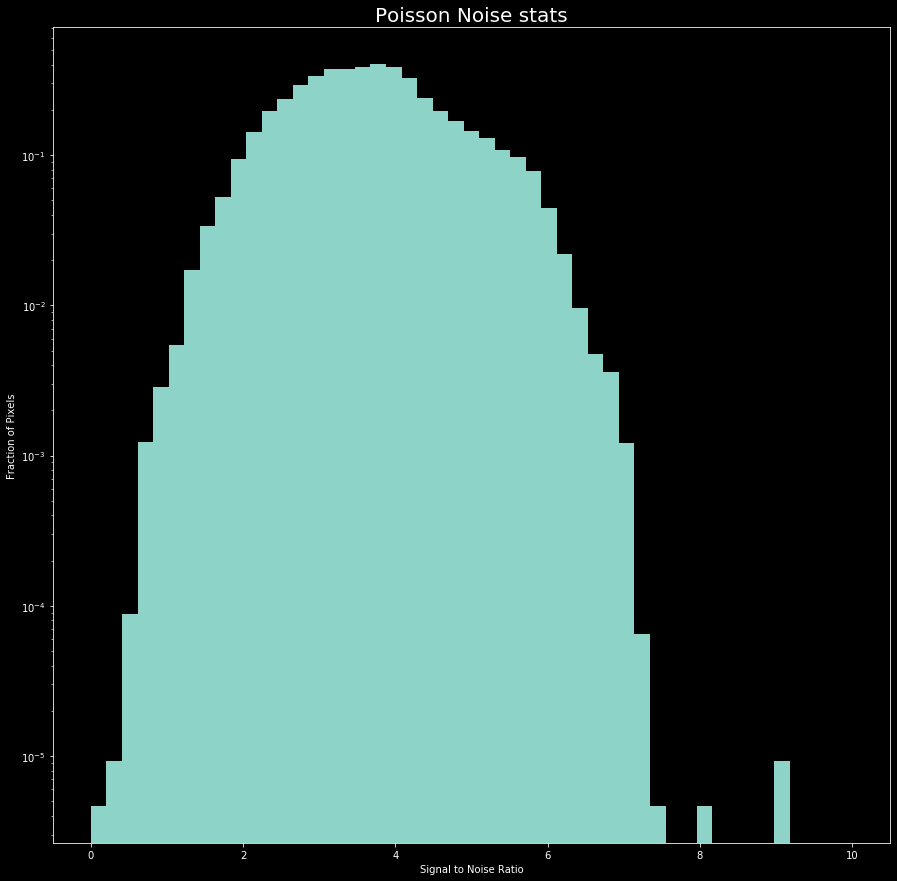

In [44]:
plt.figure(figsize=(15,15))
plt.hist(np.abs(snr).ravel(), bins=np.linspace(0,10), log=True, normed=True)
plt.title('Poisson Noise stats', fontsize='20')
plt.xlabel('Signal to Noise Ratio')
plt.ylabel('Fraction of Pixels')

In [45]:
np.count_nonzero(np.abs(snr) > 1)/(1024**2)

0.9992275238037109

# HII Region

In [19]:
header_HII = fits.getheader('W51-CBAND-feathered.fits')  
data_HII = fits.getdata('W51-CBAND-feathered.fits')  
HII_region = Beam.from_fits_header(header_HII) 

In [20]:
header_HII

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.238500000000E-04                                                  
BMIN    =   1.050600000000E-04                                                  
BPA     =   8.815000000000E+01                                                  
BTYPE   = 'Intensity'       